<h1><b><center>Projet 5_Exploration</center></b></h1>
<h1><b><center>Segmentez les clients d'un site e-commerce</center></b></h1>

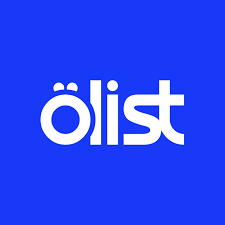

Olist est une entreprise qui propose une solution de vente sur les marketplaces en ligne. Leur filiale brésilienne souhaite que nous fournissons une une segmentation des clients pour leurs campagnes de communication. Cette segmentation sera faite en basant sur les comportements et les données personelles des clients.

<b>Objectif:</b>

Comprendre les différents types d’utilisateurs et les segmenter pour les camagnes de communication.

<b>Livrables:</b>

- L’équipe Marketing attend les différentes segmenation des clients et leurs descriptions.
- Un contrat de maintenance pour la segmentation des clients en prenant compte la stabilité du modèle.

<b>Données:</b>
Une base de données comportant des informations sur l’historique de commandes, les produits achetés, les commentaires de satisfaction, et la localisation est fourni pour l'étude. De plus, Olist n'a fourni qu'une base de donnée réduite car ils considérent que ça suffit pour le premier clustering.

Nous commeçons par l'importation des dataframes.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import unidecode
from wordcloud import WordCloud

os.chdir('Desktop/OC/Projet_5')

In [2]:
# Importation du dataframe 'items'

items = pd.read_csv('olist_order_items_dataset.csv')
items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [3]:
# Importation du dataframe 'orders'

orders = pd.read_csv('olist_orders_dataset.csv')
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [4]:
# Importation du dataframe 'customers'

customers = pd.read_csv('olist_customers_dataset.csv')
customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


Ce dataset ne nous intéresse pas car il contient des données sur les vendeurs et ce ne sont pas utiles pour la segmentation des clients.

In [5]:
# Importation du dataframe 'reviews'

reviews = pd.read_csv('olist_order_reviews_dataset.csv')
reviews

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [6]:
# Importation du dataframe 'products'

products = pd.read_csv('olist_products_dataset.csv')
products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [7]:
# Importation du dataframe 'location'

location = pd.read_csv('olist_geolocation_dataset.csv')
location

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


In [8]:
# Importation du dataframe 'categ_name'

categ_name = pd.read_csv('product_category_name_translation.csv')
categ_name

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


In [9]:
# Importation du dataframe 'sellers'

sellers = pd.read_csv('olist_sellers_dataset.csv')
sellers

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


Nous utiliserons ce dataset pour changer les noms de categories de produits.

In [10]:
# Importation du dataframe 'payments'

payments = pd.read_csv('olist_order_payments_dataset.csv')
payments

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


Ayant consulté ces données, nous avons décidé d'effectuer 3 types de clustering. Ces sont:
* Segmentation par l'avis des clients
* Segmentation par sa localisation
* Segmentation par RFM (Récence, Fréquence et Montant).

Dans ce notebook, nous préparons les données pour les segmentations. Les segmentations des clients est effectué dans le notebook Projet 5_Segmentation. La fréquence de segmentation est évaluée dans le notebook Projet 5_Maintenance.

Nous commençons par préparer le dataframe pour la segmentation des clients par l'avis des clients.

<h2><center>I. Préparation du dataframe "positive_reviews"</h2></center>

La première étape consiste à travailler avec les commandes valides.

In [11]:
# Situation des commandes

orders.groupby(by = 'order_status').count()

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
order_status,,,,,,,
approved,2,2,2,2,0,0,2
canceled,625,625,625,484,75,6,625
created,5,5,5,0,0,0,5
delivered,96478,96478,96478,96464,96476,96470,96478
invoiced,314,314,314,314,0,0,314
processing,301,301,301,301,0,0,301
shipped,1107,1107,1107,1107,1107,0,1107
unavailable,609,609,609,609,0,0,609


Parmi ces commandes, nous pouvons considérer les commandes du type 'cancelled' et 'unavailable' comme des commandes invalides. Pourtant les commandes 'unavailable' contiennent des clients intéressé par les produits du site.

In [12]:
# Suppression des commandes invalides

orders = orders[orders['order_status'] != 'canceled']
orders = orders.reset_index(drop = True)
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
98811,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
98812,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
98813,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
98814,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


Nous corrigeons le dtype des colonnes du 'orders'.

In [13]:
# dtypes des colonnes du 'orders'

orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98816 entries, 0 to 98815
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       98816 non-null  object
 1   customer_id                    98816 non-null  object
 2   order_status                   98816 non-null  object
 3   order_purchase_timestamp       98816 non-null  object
 4   order_approved_at              98797 non-null  object
 5   order_delivered_carrier_date   97583 non-null  object
 6   order_delivered_customer_date  96470 non-null  object
 7   order_estimated_delivery_date  98816 non-null  object
dtypes: object(8)
memory usage: 6.0+ MB


In [14]:
# Conversion des colonnes au dtype 'datetime'

columns_timestamp = ['order_purchase_timestamp','order_approved_at',
                     'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
for column in columns_timestamp:
    orders[column] = pd.to_datetime(orders[column])
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26
...,...,...,...,...,...,...,...,...
98811,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28
98812,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02
98813,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27
98814,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15


Maintenant, il faut traduire les catégories du portugais à l'anglais. Nous utilisons les valeurs du dataframe 'categ_name'.

In [15]:
# Changement du product category name

por_names = categ_name.product_category_name.values
ang_names = categ_name.product_category_name_english.values
products['product_category_name'] = products['product_category_name'].replace(por_names, ang_names)
products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,furniture_decor,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construction_tools_lights,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,bed_bath_table,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,computers_accessories,60.0,156.0,2.0,700.0,31.0,13.0,20.0


Ensuite, nous comptons le nombre des produits par catégorie.

In [16]:
# Nombre de produits par catégorie

products.groupby('product_category_name').count().sort_values(by = 'product_id', ascending = False)

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
product_category_name,,,,,,,,
bed_bath_table,3029,3029,3029,3029,3029,3029,3029,3029
sports_leisure,2867,2867,2867,2867,2867,2867,2867,2867
furniture_decor,2657,2657,2657,2657,2657,2657,2657,2657
health_beauty,2444,2444,2444,2444,2444,2444,2444,2444
housewares,2335,2335,2335,2335,2335,2335,2335,2335
...,...,...,...,...,...,...,...,...
home_comfort_2,5,5,5,5,5,5,5,5
fashion_childrens_clothes,5,5,5,5,5,5,5,5
pc_gamer,3,3,3,3,3,3,3,3


Nous comptons 73 catégories des produits. Il est difficile de viser les clients par ces catégories pour deux raisons: 1) beaucoup de catégories (73), 2) une différence significative en nombre de produits achetés (3029 produits pour une catégorie et 1 prouit pour une autre).

Afin de simplifier le marketing par type du produit acheté, nous groupons les produits en 12 catégories. Les clients seront ensuite visés par l'équipe de Marketing par rapport à leur satisfaction du produit et leur comportement d'achat (type de produit acheté).

In [17]:
# Définition des nouveaux catégories de produit

media = ['audio', 'books_general_interest', 'books_imported', 'books_technical', 'cds_dvds_musicals', 'dvds_blu_ray', 
         'music']
electronics = ['computers', 'computers_accessories', 'electronics', 'tablets_printing_image', 'telephony', 
               'home_appliances', 'home_appliances_2', 'small_appliances', 'small_appliances_home_oven_and_coffee',
               'pc_gamer', 'consoles_games', 'signaling_and_security', 'security_and_services', 'fixed_telephony',
               'cine_photo']
construction = ['construction_tools_construction', 'construction_tools_lights', 'construction_tools_safety',
                'costruction_tools_garden', 'costruction_tools_tools', 'home_construction']
fashion = ['fashio_female_clothing', 'fashion_bags_accessories', 'fashion_childrens_clothes', 'fashion_male_clothing',
           'fashion_shoes', 'fashion_underwear_beach', 'luggage_accessories', 'watches_gifts', 'perfumery']
groceries = ['drinks', 'food', 'food_drink', 'portateis_cozinha_e_preparadores_de_alimentos', 'stationery', 
             'christmas_supplies', 'party_supplies', 'pet_shop']
furniture = ['furniture_bedroom', 'furniture_decor', 'furniture_living_room', 'furniture_mattress_and_upholstery',
            'kitchen_dining_laundry_garden_furniture', 'office_furniture']
home = ['home_comfort_2', 'home_confort', 'housewares', 'art', 'arts_and_craftmanship', 'bed_bath_table',
        'garden_tools', 'air_conditioning', 'la_cuisine']
sports = ['sports_leisure', 'fashion_sport']
enfants = ['toys', 'diapers_and_hygiene','baby']
industrie = ['auto', 'agro_industry_and_commerce', 'industry_commerce_and_business']
divers = ['cool_stuff', 'flowers', 'market_place', 'musical_instruments']
health = ['health_beauty']

In [18]:
# Changement du product_categoory_name

products.loc[products['product_category_name'].isin(media), "product_category_name"] = "media"
products.loc[products['product_category_name'].isin(electronics), "product_category_name"] = "electronics"
products.loc[products['product_category_name'].isin(construction), "product_category_name"] = "construction"
products.loc[products['product_category_name'].isin(fashion), "product_category_name"] = "fashion"
products.loc[products['product_category_name'].isin(groceries), "product_category_name"] = "groceries"
products.loc[products['product_category_name'].isin(furniture), "product_category_name"] = "furniture"
products.loc[products['product_category_name'].isin(home), "product_category_name"] = "home"
products.loc[products['product_category_name'].isin(sports), "product_category_name"] = "sports"
products.loc[products['product_category_name'].isin(enfants), "product_category_name"] = "enfants"
products.loc[products['product_category_name'].isin(industrie), "product_category_name"] = "industrie"
products.loc[products['product_category_name'].isin(divers), "product_category_name"] = "divers"
products.loc[products['product_category_name'].isin(health), "product_category_name"] = "health"
df = products.groupby('product_category_name').count().sort_values(by = 'product_id', ascending = False)
df

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
product_category_name,,,,,,,,
home,6441,6441,6441,6441,6441,6441,6441,6441
electronics,4610,4610,4610,4610,4610,4610,4610,4610
fashion,3748,3748,3748,3748,3748,3748,3748,3748
furniture,3271,3271,3271,3271,3271,3271,3271,3271
sports,2886,2886,2886,2886,2886,2886,2886,2886
health,2444,2444,2444,2444,2444,2444,2444,2444
enfants,2342,2342,2342,2342,2341,2341,2341,2341
industrie,2042,2042,2042,2042,2042,2042,2042,2042
groceries,1936,1936,1936,1936,1936,1936,1936,1936


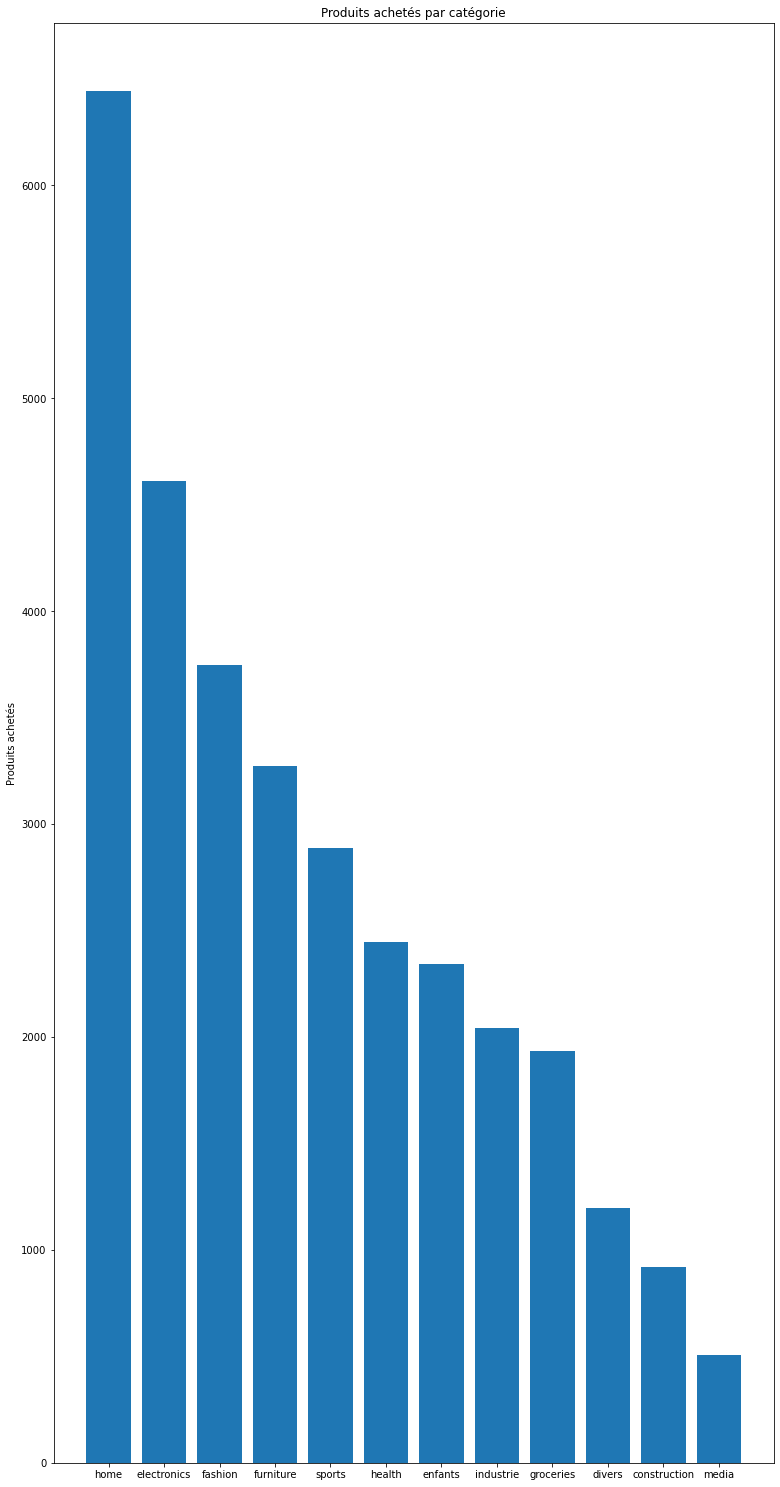

In [19]:
# Produits achetés par catégorie

fig = plt.figure(figsize = (10, 20))
ax = fig.add_axes([0,0,1,1])
category = df.index
produits = df['product_id'].values
ax.bar(category, produits)
plt.title('Produits achetés par catégorie')
plt.ylabel("Produits achetés");
plt.show()

Maintenant, nous consultons les avis des clients. Le 'review_score' indique l'avis du client sur le produit.

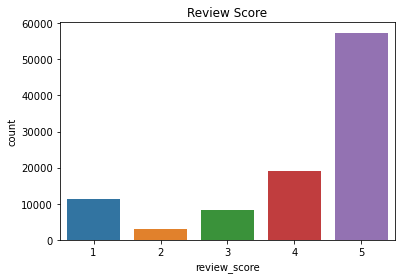

In [20]:
# Avis des clients

sns.countplot(x = 'review_score', data = reviews)
plt.title("Review Score", size = 12);

Nous constatons que la plupart des clients qui ont laissé un avis ont un avis positive du produit acheté. Nous pouvons considérer que un score de 4 ou 5 indique que le client est satisfait du produit. Un score de 1 à 3 indique que le client n'est pas satisfait du produit. Il est déconseillé de viser ces clients pour le marketing car nous risquons de les perdre.

Nous définissons une colonne 'review_bool' qui indiquera si le client est satisfait du produit ou non.

In [21]:
# Satisfaction du client représenté par 'review_bool'

reviews.insert(3, "review_bool", 0)
reviews.loc[reviews.review_score > 3, "review_bool"] = 1
reviews

,review_id,order_id,review_score,review_bool,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,1,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,1,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,1,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,1,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,1,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,1,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,1,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,1,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,1,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


Nous visualisons les commentaires positives et négatives des clients sur les produits.

In [22]:
# Définition des avis positives et négatives 

reviews['review_comment_message'] = reviews['review_comment_message'].fillna('-')

positive_comments = reviews[reviews['review_bool'] == 1]
negative_comments = reviews[reviews['review_bool'] == 0]

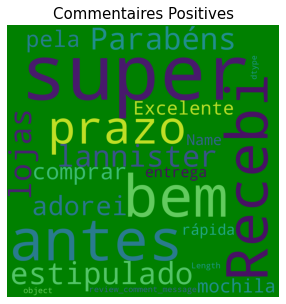

In [23]:
# Commentaires positives

plt.rcParams['figure.figsize'] = (5, 5)
plt.style.use('fast')
wc = WordCloud(background_color = 'green', width = 1500, height = 1500).generate(str(positive_comments['review_comment_message']))
plt.title('Commentaires Positives', fontsize = 15)
plt.imshow(wc)
plt.axis('off')
plt.show()

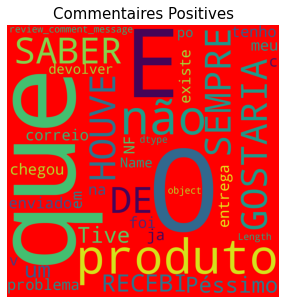

In [24]:
# Commentaires négatives

plt.rcParams['figure.figsize'] = (5, 5)
plt.style.use('fast')
wc = WordCloud(background_color = 'red', width = 1500, height = 1500).generate(str(negative_comments['review_comment_message']))
plt.title('Commentaires Positives', fontsize = 15)
plt.imshow(wc)
plt.axis('off')
plt.show()

Nous recueillons uniquement les clients satisfaits.

In [25]:
# Le dataframe 'positive_avis' contient tous les clients satisfaits

positive_avis = reviews[reviews['review_bool'] == 1]
positive_avis = positive_avis.drop_duplicates(subset = ['review_id'])
positive_avis = positive_avis.reset_index(drop = True)
positive_avis

,review_id,order_id,review_score,review_bool,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,1,NaN,-,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,1,NaN,-,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,1,NaN,-,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,1,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,1,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...,...
75912,af2dc0519de6e0720ef0c74292fb4114,d699c734a0b1c8111f2272a3f36d398c,5,1,NaN,-,2018-04-27 00:00:00,2018-04-30 01:18:57
75913,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,1,NaN,-,2018-07-07 00:00:00,2018-07-14 17:18:30
75914,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,1,NaN,-,2017-12-09 00:00:00,2017-12-11 20:06:42
75915,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,1,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43


Afin de préparer le dataframe 'positive_reviews', il faut fusionner des colonnes des autres dataframes. Nous choisissons les colonnes nécessaires pour cette fusion.

In [26]:
# Nous choisissons les colonnes nécessaires du dataframe 'produits'

products_merge = products[['product_id', 'product_category_name']]
products_merge

,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,fashion
1,3aa071139cb16b67ca9e5dea641aaa2f,home
2,96bd76ec8810374ed1b65e291975717f,sports
3,cef67bcfe19066a932b7673e239eb23d,enfants
4,9dc1a7de274444849c219cff195d0b71,home
...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,furniture
32947,bf4538d88321d0fd4412a93c974510e6,construction
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,home
32949,83808703fc0706a22e264b9d75f04a2e,electronics


In [27]:
# Nous choisissons les colonnes nécessaires du dataframe 'orders'

orders_merge = orders[['order_id', 'customer_id']]
orders_merge

,order_id,customer_id
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c
...,...,...
98811,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00
98812,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7
98813,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c
98814,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1


In [28]:
# Nous choisissons les colonnes nécessaires du dataframe 'customers'

customers_merge = customers[['customer_id', 'customer_unique_id']]
customers_merge

,customer_id,customer_unique_id
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066
...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e


Nous commençons la fusion des dataframes.

In [29]:
# Fusion du 'items' et 'products_merge' 

df_1 = pd.merge(items, products_merge, how = "left", on = 'product_id')
df_1

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,divers
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,groceries
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,furniture
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,fashion
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,home
...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,home
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,electronics
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,sports
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,electronics


In [30]:
# Fusion du 'df_1' et 'positive_avis' 

df_2 = pd.merge(positive_avis, df_1, how = "left", on = 'order_id')
df_2 = df_2.drop_duplicates(subset = ['review_id'])
df_2

,review_id,order_id,review_score,review_bool,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,1,NaN,-,2018-01-18 00:00:00,2018-01-18 21:46:59,1.0,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,2018-01-18 15:47:59,185.00,13.63,sports
2,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,1,NaN,-,2018-03-10 00:00:00,2018-03-11 03:05:13,1.0,be0dbdc3d67d55727a65d4cd696ca73c,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-06 12:48:39,79.79,8.30,electronics
3,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,1,NaN,-,2018-02-17 00:00:00,2018-02-18 14:36:24,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-02-08 10:31:15,149.00,45.12,electronics
4,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,1,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,1.0,52c80cedd4e90108bf4fa6a206ef6b03,a1043bafd471dff536d0c462352beb48,2017-04-13 17:55:19,179.99,42.85,home
5,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,1,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,1.0,3880d25d502b15b1de6fddc42ad1d67a,989becdce12ebc39863c2bceab6f3ca1,2018-02-15 15:48:21,1199.00,134.25,sports
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84311,af2dc0519de6e0720ef0c74292fb4114,d699c734a0b1c8111f2272a3f36d398c,5,1,NaN,-,2018-04-27 00:00:00,2018-04-30 01:18:57,1.0,b9ca577f48894c59a9677f895f9a44bc,527801b552d0077ffd170872eb49683b,2018-04-26 13:31:14,334.90,16.43,media
84312,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,1,NaN,-,2018-07-07 00:00:00,2018-07-14 17:18:30,1.0,4fb209073dc2ab6a6d3c259a7c285501,5343d0649eca2a983820bfe93fc4d17e,2018-07-02 17:30:37,226.77,61.20,furniture
84313,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,1,NaN,-,2017-12-09 00:00:00,2017-12-11 20:06:42,1.0,3a33c980b62eb1ef3b8ae61b6fc6fe55,46dc3b2cc0980fb8ec44634e21d2718e,2017-12-07 22:08:00,199.99,9.77,enfants
84314,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,1,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43,1.0,8ba0118a487ec8671aed57e5ef846574,17ca9b9e9b9ef8fdb529001b49ebb50f,2018-03-22 10:08:04,215.97,15.59,groceries


In [31]:
# Fusion du 'df_2' et 'orders_merge' 

df_3 = pd.merge(df_2, orders_merge, how = "left", on = 'order_id')
df_3

,review_id,order_id,review_score,review_bool,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,customer_id
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,1,NaN,-,2018-01-18 00:00:00,2018-01-18 21:46:59,1.0,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,2018-01-18 15:47:59,185.00,13.63,sports,41dcb106f807e993532d446263290104
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,1,NaN,-,2018-03-10 00:00:00,2018-03-11 03:05:13,1.0,be0dbdc3d67d55727a65d4cd696ca73c,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-06 12:48:39,79.79,8.30,electronics,8a2e7ef9053dea531e4dc76bd6d853e6
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,1,NaN,-,2018-02-17 00:00:00,2018-02-18 14:36:24,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-02-08 10:31:15,149.00,45.12,electronics,e226dfed6544df5b7b87a48208690feb
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,1,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,1.0,52c80cedd4e90108bf4fa6a206ef6b03,a1043bafd471dff536d0c462352beb48,2017-04-13 17:55:19,179.99,42.85,home,de6dff97e5f1ba84a3cd9a3bc97df5f6
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,1,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,1.0,3880d25d502b15b1de6fddc42ad1d67a,989becdce12ebc39863c2bceab6f3ca1,2018-02-15 15:48:21,1199.00,134.25,sports,5986b333ca0d44534a156a52a8e33a83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75912,af2dc0519de6e0720ef0c74292fb4114,d699c734a0b1c8111f2272a3f36d398c,5,1,NaN,-,2018-04-27 00:00:00,2018-04-30 01:18:57,1.0,b9ca577f48894c59a9677f895f9a44bc,527801b552d0077ffd170872eb49683b,2018-04-26 13:31:14,334.90,16.43,media,0c7e5a2123d793a5b2059cca7f650dc8
75913,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,1,NaN,-,2018-07-07 00:00:00,2018-07-14 17:18:30,1.0,4fb209073dc2ab6a6d3c259a7c285501,5343d0649eca2a983820bfe93fc4d17e,2018-07-02 17:30:37,226.77,61.20,furniture,d8c466a3e7c4cda36cd4ae7d577f44f4
75914,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,1,NaN,-,2017-12-09 00:00:00,2017-12-11 20:06:42,1.0,3a33c980b62eb1ef3b8ae61b6fc6fe55,46dc3b2cc0980fb8ec44634e21d2718e,2017-12-07 22:08:00,199.99,9.77,enfants,d0d7086dea6fcf42b9b690b9f3745c58
75915,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,1,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43,1.0,8ba0118a487ec8671aed57e5ef846574,17ca9b9e9b9ef8fdb529001b49ebb50f,2018-03-22 10:08:04,215.97,15.59,groceries,fcc7b1caafe3b77fd587bab964c4d1fb


In [32]:
# Création du dataframe 'positive_reviews'

positive_reviews = pd.merge(df_3, customers_merge, how = "left", on = 'customer_id')
positive_reviews

,review_id,order_id,review_score,review_bool,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,customer_id,customer_unique_id
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,1,NaN,-,2018-01-18 00:00:00,2018-01-18 21:46:59,1.0,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,2018-01-18 15:47:59,185.00,13.63,sports,41dcb106f807e993532d446263290104,68a5590b9926689be4e10f4ae2db21a8
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,1,NaN,-,2018-03-10 00:00:00,2018-03-11 03:05:13,1.0,be0dbdc3d67d55727a65d4cd696ca73c,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-06 12:48:39,79.79,8.30,electronics,8a2e7ef9053dea531e4dc76bd6d853e6,64190b91b656ab8f37eb89b93dc84584
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,1,NaN,-,2018-02-17 00:00:00,2018-02-18 14:36:24,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-02-08 10:31:15,149.00,45.12,electronics,e226dfed6544df5b7b87a48208690feb,1d47144362c14e94ccdd213e8ec277d5
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,1,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,1.0,52c80cedd4e90108bf4fa6a206ef6b03,a1043bafd471dff536d0c462352beb48,2017-04-13 17:55:19,179.99,42.85,home,de6dff97e5f1ba84a3cd9a3bc97df5f6,c8cf6cb6b838dc7a33ed199b825e8616
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,1,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,1.0,3880d25d502b15b1de6fddc42ad1d67a,989becdce12ebc39863c2bceab6f3ca1,2018-02-15 15:48:21,1199.00,134.25,sports,5986b333ca0d44534a156a52a8e33a83,d16000272660a1fef81482ad75ba572a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75912,af2dc0519de6e0720ef0c74292fb4114,d699c734a0b1c8111f2272a3f36d398c,5,1,NaN,-,2018-04-27 00:00:00,2018-04-30 01:18:57,1.0,b9ca577f48894c59a9677f895f9a44bc,527801b552d0077ffd170872eb49683b,2018-04-26 13:31:14,334.90,16.43,media,0c7e5a2123d793a5b2059cca7f650dc8,00db0070b3c3bd0215072323c8499407
75913,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,1,NaN,-,2018-07-07 00:00:00,2018-07-14 17:18:30,1.0,4fb209073dc2ab6a6d3c259a7c285501,5343d0649eca2a983820bfe93fc4d17e,2018-07-02 17:30:37,226.77,61.20,furniture,d8c466a3e7c4cda36cd4ae7d577f44f4,50605c81f77a2171191dffee444613b2
75914,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,1,NaN,-,2017-12-09 00:00:00,2017-12-11 20:06:42,1.0,3a33c980b62eb1ef3b8ae61b6fc6fe55,46dc3b2cc0980fb8ec44634e21d2718e,2017-12-07 22:08:00,199.99,9.77,enfants,d0d7086dea6fcf42b9b690b9f3745c58,597cbb334f18a671472f7e16648228b4
75915,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,1,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43,1.0,8ba0118a487ec8671aed57e5ef846574,17ca9b9e9b9ef8fdb529001b49ebb50f,2018-03-22 10:08:04,215.97,15.59,groceries,fcc7b1caafe3b77fd587bab964c4d1fb,c860357db400d72a2497064f8376fba9


<h2><center>II. Préparation du dataframe "positive_reviews_location"</h2></center>

Nous traçons les clients par région afin de comprendre la distribution des clients.

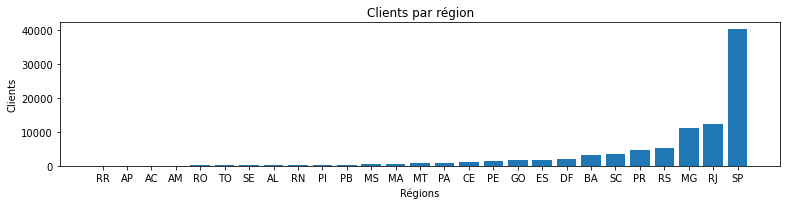

In [33]:
# Clients par région

state_plot = customers.drop_duplicates(subset = ["customer_unique_id"])
states = state_plot.groupby('customer_state').count().sort_values('customer_id', ascending = True)

fig = plt.figure(figsize = (10, 2))
ax = fig.add_axes([0,0,1,1])
state = states.index
nombre = states['customer_id'].values
ax.bar(state, nombre)
plt.title('Clients par région')
plt.xlabel("Régions");
plt.ylabel("Clients");
plt.show()

Plus que la moitié des clients viennent de la région de São Paulo.

Pour la préparation de ce dataframe, il faut d'abord l'errata des noms des villes.

In [34]:
# Noms uniques des villes

print('Nombre de villes uniques:', len(location['geolocation_city'].unique()))
location['geolocation_city'].unique()

Nombre de villes uniques: 8011


array(['sao paulo', 'são paulo', 'sao bernardo do campo', ..., 'ciríaco',
       'estação', 'vila lângaro'], dtype=object)

Nous trouvons des valeurs redondates pour les noms de villes.

In [35]:
# Homogénisation des noms des villes

def homogenize(column):
    column_space = ' '.join(column.split())
    return unidecode.unidecode(column_space.lower())

location['geolocation_city'] = location['geolocation_city'].apply(homogenize)

print('Nombre de villes uniques suite aux corrections:', len(location['geolocation_city'].unique()))

Nombre de villes uniques suite aux corrections: 5967


Nous traçons les geolocations (Latitude, Longitude) des clients.

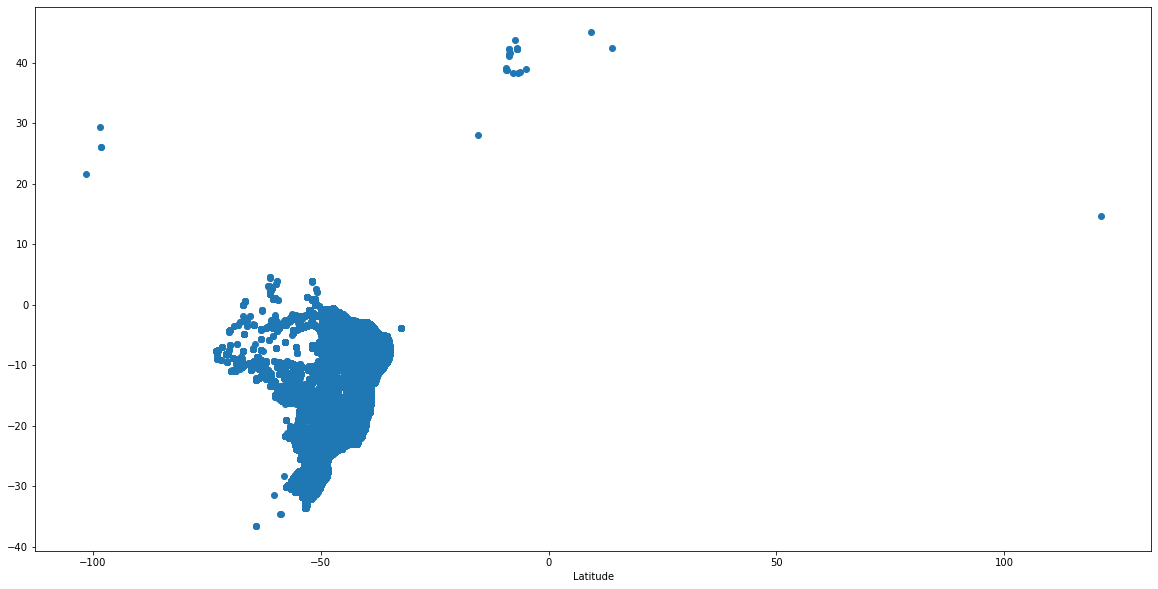

In [36]:
# Plot de Latitude et Longitude

plt.figure(figsize = (20, 10))
plt.scatter(location['geolocation_lng'], location['geolocation_lat']);
plt.xlabel("Longitude");
plt.xlabel("Latitude");

Nous constatons que les différents points marquent une silhouette de la carte du Brésil. Pourtant, il y a beacoup des points qui sont dehors les frontières du Brésil. Ces points peuvent être les clients qui utilisent le site de l'étranger. Nous les viserons pour le marketing. 

Afin de viser (et ensuite supprimer) les points dehors des frontières du Brésil, nous définissons les limites géographiques du pays (Nord, Sud, Est, Ouest). Nous considérons une marge d'erreur de 50 kms pour les limites géographiques afin de considérer les erreurs de geolocalisation (erreurs dûes au GPS). 

Les limites géographiques du pays sont:

<b>Limite Nord du pays:</b> ["geolocation_lat"] > 5.7486

<b>Limite Sud du pays:</b> ["geolocation_lat"] < -34.2497

<b>Limite Ouest du pays:</b> ["geolocation_lng"] < -74.4816

<b>Limite Est du pays:</b> ["geolocation_lng"] > -34.2440

In [37]:
# Nombre des points dehors les limites géographiques

northern_limit = location[location["geolocation_lat"] > 5.7486]
southern_limit = location[location["geolocation_lat"] < -34.2497]
western_limit = location[location["geolocation_lng"] < -74.4816]
eastern_limit = location[location["geolocation_lng"] > -34.244]
print("Points dehors des limites nord:", len(northern_limit))
print("Points dehors des limites sud:", len(southern_limit))
print("Points dehors des limites ouest:", len(western_limit))
print("Points dehors des limites est:", len(eastern_limit))

Points dehors des limites nord: 26
Points dehors des limites sud: 5
Points dehors des limites ouest: 4
Points dehors des limites est: 33


Ces points sont supprimés du dataframe 'location'.

In [38]:
# Suppression des points dehors les limites géographiques du pays

rows = northern_limit.index
rows = rows.append(southern_limit.index)
rows = rows.append(western_limit.index)
rows = rows.append(eastern_limit.index)

location.drop(index = rows, inplace = True)
location = location.reset_index(drop = True)
location

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000116,99950,-28.068639,-52.010705,tapejara,RS
1000117,99900,-27.877125,-52.224882,getulio vargas,RS
1000118,99950,-28.071855,-52.014716,tapejara,RS
1000119,99980,-28.388932,-51.846871,david canabarro,RS


In [39]:
# Plusieurs geolocations points par zip code

location[location['geolocation_zip_code_prefix'] == 1001]

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
99,1001,-23.549292,-46.633559,sao paulo,SP
206,1001,-23.550498,-46.634338,sao paulo,SP
235,1001,-23.550642,-46.634410,sao paulo,SP
299,1001,-23.549698,-46.633909,sao paulo,SP
326,1001,-23.551427,-46.634074,sao paulo,SP
429,1001,-23.550498,-46.634338,sao paulo,SP
519,1001,-23.551337,-46.634027,sao paulo,SP
575,1001,-23.549779,-46.633957,sao paulo,SP
583,1001,-23.551337,-46.634027,sao paulo,SP
596,1001,-23.550498,-46.634338,sao paulo,SP


Compte tenu du fait qu'il y a plusieurs points de geolocalisation pour un zip code donné, nous allons définir un seul par zip code.

In [40]:
# Un seul geolocation point par Zip Code

location = location.rename(columns={'geolocation_zip_code_prefix': 'customer_zip_code_prefix'})
location_merge = location.groupby('customer_zip_code_prefix').mean()
location_merge

,geolocation_lat,geolocation_lng
customer_zip_code_prefix,,
1001,-23.550190,-46.634024
1002,-23.548146,-46.634979
1003,-23.548994,-46.635731
1004,-23.549799,-46.634757
1005,-23.549456,-46.636733
...,...,...
99960,-27.953722,-52.025511
99965,-28.183372,-52.039850
99970,-28.343766,-51.874689


Nous traçons la carte de la geolocalisation suite aux corrections.

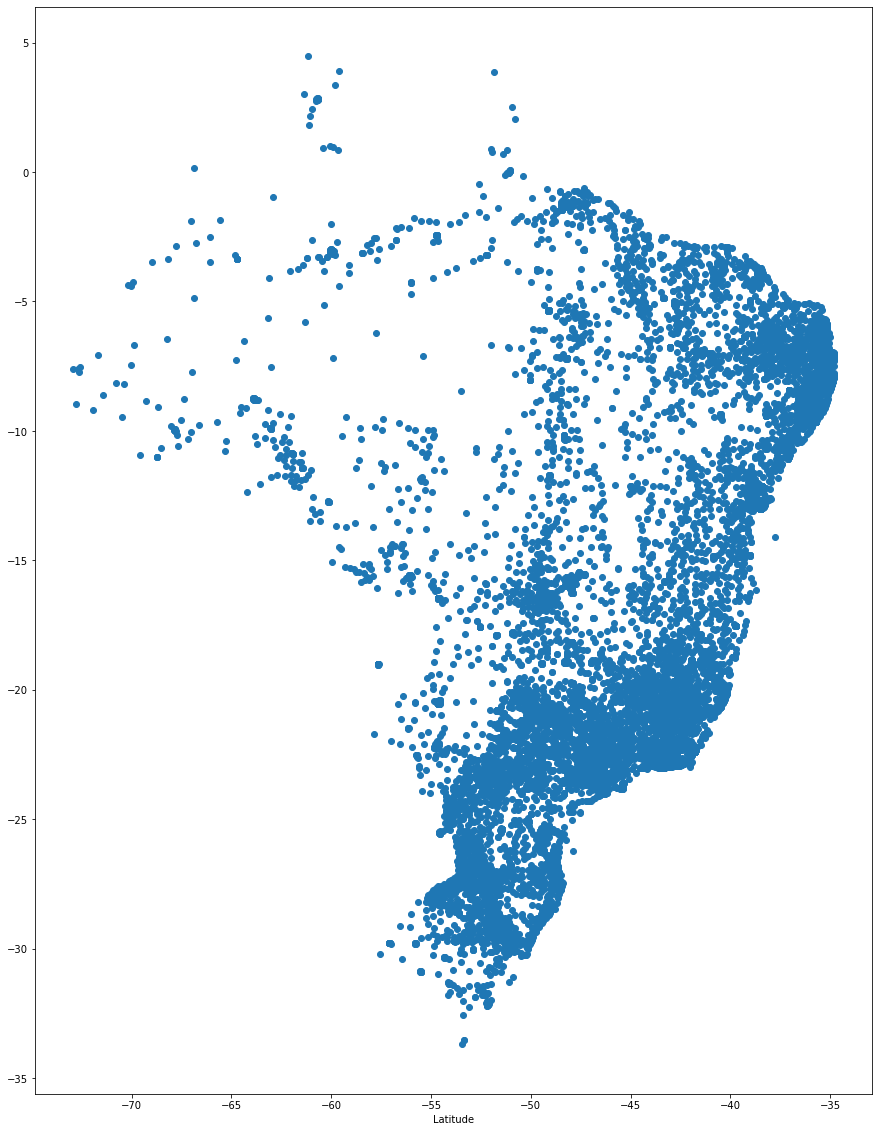

In [41]:
# Plot de Latitude et Longitude

plt.figure(figsize = (15, 20))
plt.scatter(location_merge['geolocation_lng'], location_merge['geolocation_lat']);
plt.xlabel("Longitude");
plt.xlabel("Latitude");

Nous constatons que ces points font à peu près la silhouette du Brésil et nous pouvons donc considérer ces points valides. Maintenant, nous créons le dataframe 'positive_reviews_location'.

In [42]:
# customers_loc

customers_loc = customers[['customer_unique_id', 'customer_zip_code_prefix']]
customers_loc

,customer_unique_id,customer_zip_code_prefix
0,861eff4711a542e4b93843c6dd7febb0,14409
1,290c77bc529b7ac935b93aa66c333dc3,9790
2,060e732b5b29e8181a18229c7b0b2b5e,1151
3,259dac757896d24d7702b9acbbff3f3c,8775
4,345ecd01c38d18a9036ed96c73b8d066,13056
...,...,...
99436,1a29b476fee25c95fbafc67c5ac95cf8,3937
99437,d52a67c98be1cf6a5c84435bd38d095d,6764
99438,e9f50caf99f032f0bf3c55141f019d99,60115
99439,73c2643a0a458b49f58cea58833b192e,92120


In [43]:
# Geolocalisation de tous les clients

customers_loc_tous = pd.merge(customers_loc, location_merge, how = 'left', on = 'customer_zip_code_prefix')
customers_loc_tous

,customer_unique_id,customer_zip_code_prefix,geolocation_lat,geolocation_lng
0,861eff4711a542e4b93843c6dd7febb0,14409,-20.498489,-47.396929
1,290c77bc529b7ac935b93aa66c333dc3,9790,-23.727992,-46.542848
2,060e732b5b29e8181a18229c7b0b2b5e,1151,-23.531642,-46.656289
3,259dac757896d24d7702b9acbbff3f3c,8775,-23.499702,-46.185233
4,345ecd01c38d18a9036ed96c73b8d066,13056,-22.975100,-47.142925
...,...,...,...,...
99436,1a29b476fee25c95fbafc67c5ac95cf8,3937,-23.586003,-46.499638
99437,d52a67c98be1cf6a5c84435bd38d095d,6764,-23.615830,-46.768533
99438,e9f50caf99f032f0bf3c55141f019d99,60115,-3.734569,-38.510534
99439,73c2643a0a458b49f58cea58833b192e,92120,-29.949839,-51.168494


In [44]:
# Clients satisfaits et leur location

positive_reviews_location = pd.merge(positive_reviews, customers_loc_tous, how = 'left', on = 'customer_unique_id')
positive_reviews_location = positive_reviews_location.drop_duplicates(subset = ["customer_unique_id"])
positive_reviews_location = positive_reviews_location[positive_reviews_location['geolocation_lat'].notna()]
positive_reviews_location = positive_reviews_location.reset_index(drop = True)
positive_reviews_location

,review_id,order_id,review_score,review_bool,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,customer_id,customer_unique_id,customer_zip_code_prefix,geolocation_lat,geolocation_lng
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,1,NaN,-,2018-01-18 00:00:00,2018-01-18 21:46:59,1.0,fd25ab760bfbba13c198fa3b4f1a0cd3,6d803cb79cc31c41c4c789a75933b3c7,2018-01-18 15:47:59,185.00,13.63,sports,41dcb106f807e993532d446263290104,68a5590b9926689be4e10f4ae2db21a8,6030.0,-23.557079,-46.767579
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,1,NaN,-,2018-03-10 00:00:00,2018-03-11 03:05:13,1.0,be0dbdc3d67d55727a65d4cd696ca73c,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-06 12:48:39,79.79,8.30,electronics,8a2e7ef9053dea531e4dc76bd6d853e6,64190b91b656ab8f37eb89b93dc84584,13380.0,-22.785779,-47.312537
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,1,NaN,-,2018-02-17 00:00:00,2018-02-18 14:36:24,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-02-08 10:31:15,149.00,45.12,electronics,e226dfed6544df5b7b87a48208690feb,1d47144362c14e94ccdd213e8ec277d5,44571.0,-12.967176,-39.243114
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,1,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,1.0,52c80cedd4e90108bf4fa6a206ef6b03,a1043bafd471dff536d0c462352beb48,2017-04-13 17:55:19,179.99,42.85,home,de6dff97e5f1ba84a3cd9a3bc97df5f6,c8cf6cb6b838dc7a33ed199b825e8616,88735.0,-28.328525,-49.049950
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,1,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,1.0,3880d25d502b15b1de6fddc42ad1d67a,989becdce12ebc39863c2bceab6f3ca1,2018-02-15 15:48:21,1199.00,134.25,sports,5986b333ca0d44534a156a52a8e33a83,d16000272660a1fef81482ad75ba572a,89520.0,-27.290949,-50.577361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73544,af2dc0519de6e0720ef0c74292fb4114,d699c734a0b1c8111f2272a3f36d398c,5,1,NaN,-,2018-04-27 00:00:00,2018-04-30 01:18:57,1.0,b9ca577f48894c59a9677f895f9a44bc,527801b552d0077ffd170872eb49683b,2018-04-26 13:31:14,334.90,16.43,media,0c7e5a2123d793a5b2059cca7f650dc8,00db0070b3c3bd0215072323c8499407,15035.0,-20.812707,-49.415040
73545,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,1,NaN,-,2018-07-07 00:00:00,2018-07-14 17:18:30,1.0,4fb209073dc2ab6a6d3c259a7c285501,5343d0649eca2a983820bfe93fc4d17e,2018-07-02 17:30:37,226.77,61.20,furniture,d8c466a3e7c4cda36cd4ae7d577f44f4,50605c81f77a2171191dffee444613b2,74810.0,-16.701907,-49.239576
73546,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,1,NaN,-,2017-12-09 00:00:00,2017-12-11 20:06:42,1.0,3a33c980b62eb1ef3b8ae61b6fc6fe55,46dc3b2cc0980fb8ec44634e21d2718e,2017-12-07 22:08:00,199.99,9.77,enfants,d0d7086dea6fcf42b9b690b9f3745c58,597cbb334f18a671472f7e16648228b4,22793.0,-23.000619,-43.404718
73547,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,1,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43,1.0,8ba0118a487ec8671aed57e5ef846574,17ca9b9e9b9ef8fdb529001b49ebb50f,2018-03-22 10:08:04,215.97,15.59,groceries,fcc7b1caafe3b77fd587bab964c4d1fb,c860357db400d72a2497064f8376fba9,37200.0,-21.244709,-44.999202


Il nous reste qu'à créer le dataframe 'rfm_data'.

<h2><center>III. Préparation du dataframe "rfm_data"</h2></center>

Il faut d'abord calculer le prix total de chaque commande.

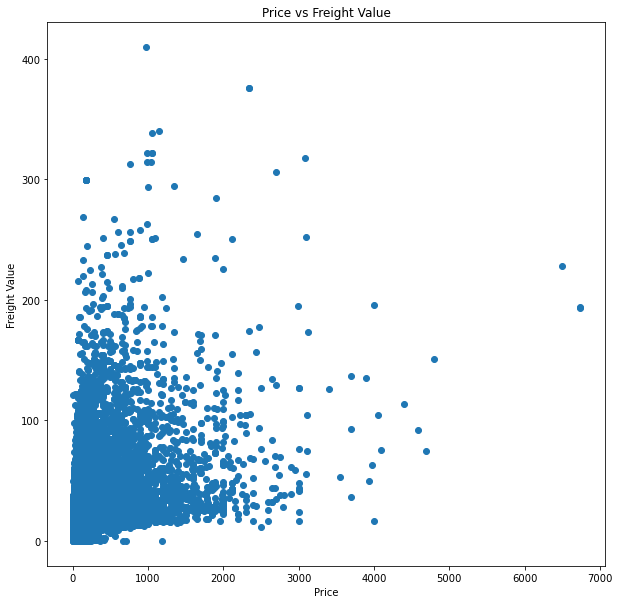

In [45]:
plt.figure(figsize = (10, 10))
plt.scatter(items['price'], items['freight_value']);
plt.xlabel('Price')
plt.ylabel('Freight Value')
plt.title('Price vs Freight Value');

In [46]:
# Total value de chaque produit

items['Total_Value'] = items['price'] + items['freight_value']
df_1['Total_Value'] = items['Total_Value']
df_4 = df_1.groupby('order_id').agg({'price':sum, 'freight_value':sum, 'Total_Value':sum}).reset_index()
df_4

,order_id,price,freight_value,Total_Value
0,00010242fe8c5a6d1ba2dd792cb16214,58.90,13.29,72.19
1,00018f77f2f0320c557190d7a144bdd3,239.90,19.93,259.83
2,000229ec398224ef6ca0657da4fc703e,199.00,17.87,216.87
3,00024acbcdf0a6daa1e931b038114c75,12.99,12.79,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90,18.14,218.04
...,...,...,...,...
98661,fffc94f6ce00a00581880bf54a75a037,299.99,43.41,343.40
98662,fffcd46ef2263f404302a634eb57f7eb,350.00,36.53,386.53
98663,fffce4705a9662cd70adb13d4a31832d,99.90,16.95,116.85
98664,fffe18544ffabc95dfada21779c9644f,55.99,8.72,64.71


Afin d'évaluer les valeurs de 'Récence', il faut trouver la valeur du premier et dernier achat.

In [47]:
# Première et dernière commande de la base de données

min = min(orders['order_purchase_timestamp'])
max = max(orders['order_purchase_timestamp'])
print('La première commande de la base de données:', min)
print('La dernière commande de la base de données:', max)

La première commande de la base de données: 2016-09-04 21:15:19
La dernière commande de la base de données: 2018-09-03 09:06:57


Nous travaillons uniquement avec les commandes valides. De ce fait, nous fusionnons le dataframe 'df_4' avec 'orders'.

In [48]:
# Commandes valides

df_5 = orders.merge(df_4, on = 'order_id', how = 'inner')
df_5

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,price,freight_value,Total_Value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,29.99,8.72,38.71
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,118.70,22.76,141.46
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,159.90,19.22,179.12
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,45.00,27.20,72.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,19.90,8.72,28.62
...,...,...,...,...,...,...,...,...,...,...,...
98200,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,72.00,13.08,85.08
98201,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,174.90,20.10,195.00
98202,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,205.99,65.02,271.01
98203,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,359.98,81.18,441.16


In [49]:
# Préparation du dataframe avant de créer 'rfm_data'

df_6 = customers.merge(df_5, on = 'customer_id', how = 'inner')
df_6['purchase_date'] = df_6['order_purchase_timestamp']
df_6

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,price,freight_value,Total_Value,purchase_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,124.99,21.88,146.87,2017-05-16 15:05:35
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,289.00,46.48,335.48,2018-01-12 20:48:24
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,139.94,17.79,157.73,2018-05-19 16:07:45
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,149.94,23.36,173.30,2018-03-13 16:06:38
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,230.00,22.25,252.25,2018-07-29 09:51:30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98200,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25,74.90,13.88,88.78,2018-04-07 15:48:17
98201,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20,114.90,14.16,129.06,2018-04-04 08:20:22
98202,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02,37.00,19.04,56.04,2018-04-08 20:11:50
98203,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05,689.00,22.07,711.07,2017-11-03 21:08:33


Maintenant, nous pouvons créer le dataframe 'rfm_data'.

In [50]:
# Création du 'rfm_data'

rfm_data = df_6.groupby('customer_unique_id').agg({'purchase_date': lambda x: (max),
                                                   'order_purchase_timestamp': lambda x: (max - x.max()).days,
                                                   'customer_id': 'count',
                                                   'price': 'sum'}).reset_index()
rfm_data.columns =['customer_unique_id', 'purchase_date', 'recénce', 'fréquence', 'montant']
rfm_data

,customer_unique_id,purchase_date,recénce,fréquence,montant
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-09-03 09:06:57,115,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-09-03 09:06:57,118,1,18.90
2,0000f46a3911fa3c0805444483337064,2018-09-03 09:06:57,541,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,2018-09-03 09:06:57,325,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,2018-09-03 09:06:57,292,1,180.00
...,...,...,...,...,...
94984,fffcf5a5ff07b0908bd4e2dbc735a684,2018-09-03 09:06:57,451,1,1570.00
94985,fffea47cd6d3cc0a88bd621562a9d061,2018-09-03 09:06:57,266,1,64.89
94986,ffff371b4d645b6ecea244b27531430a,2018-09-03 09:06:57,572,1,89.90
94987,ffff5962728ec6157033ef9805bacc48,2018-09-03 09:06:57,123,1,115.00


Le dataframe 'rfm_data' est prêt. Nous traçons chaque variable afin de comprendre le comportement des clients.

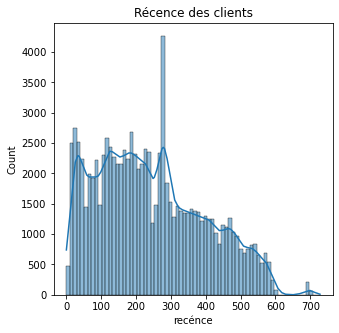

In [51]:
# Nombre de clients par leur dernier commande sur le site

sns.histplot(x = 'recénce', data = rfm_data, kde = True);
plt.title('Récence des clients');

Nous constatons qu'il y a beaucoup des clients qui n'ont pas utilisé le site depuis longtemps.

Pourcentage de clients qui ont utilisé le site plus d'une fois 3.039299287285896 %


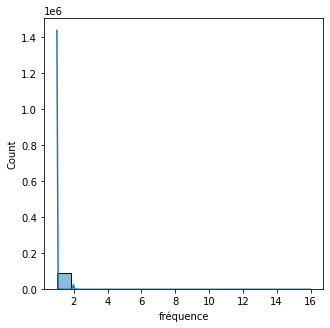

In [52]:
# Nombre de clients par le nombre de visites (commandes) sur le site

sns.histplot(x = 'fréquence', data = rfm_data, kde = True);
print("Pourcentage de clients qui ont utilisé le site plus d'une fois", 
      rfm_data[rfm_data['fréquence'] > 1].shape[0] * 100 / rfm_data.shape[0], '%')

Peu de clients ont réutilisé le site. Ceci peut expliquer le grand nombre de clients avec une valeur de 'récence' assez élevée.

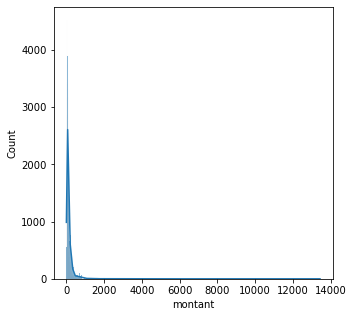

In [53]:
# Nombre de clients par le montant dépensé sur le site

sns.histplot(x = 'montant', data = rfm_data, kde = True);

Maintenant, nous exportons les 3 dataframes afin de les utiliser dans les notebooks: Projet 5_Segmentation, Projet 5_Maintenance.

In [54]:
# Enregistrer les dataframe en tant que fichier .csv

positive_reviews.to_csv('positive_reviews.csv')
positive_reviews_location.to_csv('positive_reviews_location.csv')
rfm_data.to_csv('rfm_data.csv')
df_6.to_csv('df_6.csv')